In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
confg_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozeen_model="frozen_inference_graph.pb"

In [3]:
model=cv2.dnn_DetectionModel(frozeen_model,confg_file)

In [4]:
classlabels=[]
with open ("labels.txt","rt") as f:
    classlabels=f.read().rstrip("\n").split("\n")

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000199C17E7EB0>

In [ ]:
img=cv2.imread("group 2.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Image Detection

In [17]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [18]:
print(ClassIndex)

[1 1 1 1 1]


In [19]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

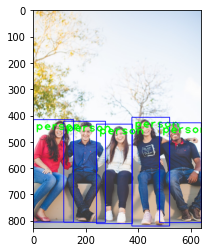

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video Detection

In [53]:
cap=cv2.VideoCapture("british_highway_traffic.mp4")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))
while True:
    font_scale=3
    font=cv2.FONT_HERSHEY_PLAIN
    
    isTrue,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.4)
    print(ClassIndex)
    if isTrue:
#         frame = cv2.flip(frame,0)
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    out.write(frame)
    cv2.imshow("Object Detected Video",frame)
    if cv2.waitKey(1) & 0xFF ==ord('d'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

[ 3  3  3  3  8  3  3  8  3  3  3  3  3  3  3  3 10  8  8  3  3  3  3]
[ 3  3  3  3  3  8  3  8  3  3  3 10  3  3  8  3  3 10  3  3  3  3  3  3]
[ 3  3  3  3  3  3  8  3  3  8 10  3  3 10  8  3  3  3 10  3  8 10  3  3
  3]
[ 3  3  3  3  3  3  8  3 10  3  3  8  3  3 10 10  3 10  8  3  3  3  3]
[ 3  3  8  3  3  3  3  3  8  3 10  3  3  3  3 10 10  8  3  3  3  8 10  3
  3  3]
[ 3  3  8  3  3  3  8  3  3 10  3  3  3  8  3  3 10 10  3  3  3  3  3 10
  3]
[ 3  3  3  3  3  8  3 10  8  3  3  3  3  8  3  3 10 10  3  3  3 10  3  3
  8]
[ 3  3  3  3  3  8  8 10  3  3  3  8  3  3 10  3  3  3  3  8 10  7 10  3
  3  3  3  8  3]
[ 3  3  3  3  3  8  3 10  8  8  3  3  3  8  3  3 10  3  3  3  3 10  7 10
  3  3  3  3  3  3]


# VIdeo Detection Using Camera

In [40]:
cap=cv2.VideoCapture(0)

while True:
    font_scale=3
    font=cv2.FONT_HERSHEY_PLAIN
    
    isTrue,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow("Object Detected Video",frame)
    if cv2.waitKey(2) & 0xFF ==ord('d'):
        break
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[46]
[ 1 17]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[17]
[1]
[17]
[17]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
[17]
[1]
[1]
[17  1]
[ 1 17]
[17]
[1]
[ 1 17]
[17  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[17]
[ 1 17]
[1 1]
[ 1 17]
[17 17]
[1]
[17]
[17]
[17]
[17  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[17]
[17]
[17]
()
[1]
[17]
[17]
[1]
[1]
[17]
()
[1]
[32  1]
[ 1 32]
[1]
[ 1 32]
[1]
[1]
[1]
[ 1 60]
[1]
[1]
[77  1]
[77  1]
[1]
[77  1]
[ 1 77]
[1]
[1]
[46]
[77  1]
[77  1]
[77  1]
[77  1 77]
[77  1 77]
[77 77  1]
[77 77  1]
[77  1]
[77]
[77]
[77]
[77]
[77  1]
[77  1]
[ 1 77]
[77 77]
[ 1 77]
[ 1 77 77]
[1]
[ 1 77]
[77]
[ 1 77]
[77  1]
[77  1 75]
[77  1]
[77 77  1]
[77  1]
[77  1]
[ 1 77]
[77  1]
[ 1 77]
[1]
[77]
[75  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[77  1]
[1]
()
()
()
()
()
()
()
()
()
()
[17]
()
[17]
[17]
[1]
()
()
()
()
()
[